# Matplotlib

Matplotlib is a library built for creating high-quality plots.
It provides control over several aspects of plots, can be used with Latex, can generate animations, and can output plots in various formats (like png, jpg and PDF).
Furthermore, Matplotlib is a building block for [several other libraries](https://matplotlib.org/thirdpartypackages/index.html) ([HoloViews](http://holoviews.org/index.html), [Bokeh](https://bokeh.pydata.org/en/latest/) and [seaborn](http://seaborn.pydata.org) are interesting projects).




# Install



Matplotlib can be installed with `pip`.
After activating your environment in the terminal, run:



In [1]:
pip install matplotlib

Now `matplotlib` is available for Python and can be imported with:



In [1]:
import matplotlib

All of the Matplotlib functionality can now be accessed via the object `matplotlib`.
Matplotlib offers all of the plotting functionality in the sub-package `pyplot`, which can be imported as:



In [3]:
import matplotlib.pyplot as plt

Which makes the `matplotlib.pyplot` functionality available via `plt`.

While using jupyter notebook, we will also execute a special command that starts with the percentage symbol.
These type of commands are particular to jupyter and are not part of the Python language.
These commands are used to configure how the notebook interacts with certain features of Python.



In [1]:
%matplotlib inline

This command enables the display of figures directly in the notebook in the result part of the code cell.
An alternative, would be `%matplotlib`, which would open a window outside the notebook.
You read more about it [on the reference page](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib).




# Basics



Matplotlib offers two different styles for plotting: a high-level approach and a object-oriented approach.
The high-level approach is convenient for quick plots:



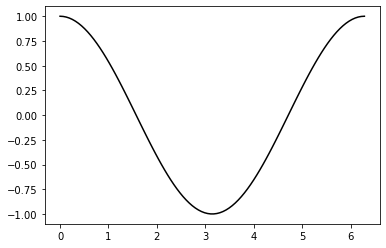

In [4]:
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)

# Plot the graph of y
plt.plot(x, y, 'k-', linewidth=1.5)
plt.show()

The function `plot` takes care of creating the figure window, adding the axes and then plotting the curve.
While this is simple and convenient in some cases, it also creates several variables in the `plt` namespace without alerting the user.

The second approach, and the one that is more Pythonic (to see Python guidelines type `import this`), makes the creation of the figure more explicit:



/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


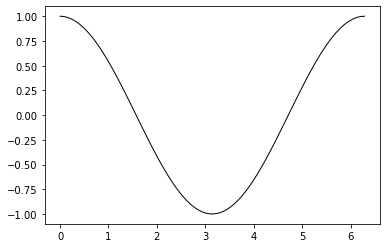

In [5]:
fig, ax = plt.subplots()
# subplots creates a window figure and the axes for plotting,
# and then returns both objects
ax.plot(x, y, 'k-', linewidth=1)
fig.show()

This second approach is object-oriented, since we use the methods of the object `ax` to create draw the plot on the figure.
This approach is explicit on what it is doing, but also offers more fine control over the plot.




# Scatter Plots



Let's generate some fake data to plot:



In [6]:
import numpy as np
noise = np.random.normal(size=(1000, 1))
x = np.random.normal(size=(1000, 1))
beta = np.random.uniform(size=(1, 1))
y = x@beta + noise

We will create a scatter plot while specifying many of the options that you might use in your own plots.



/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


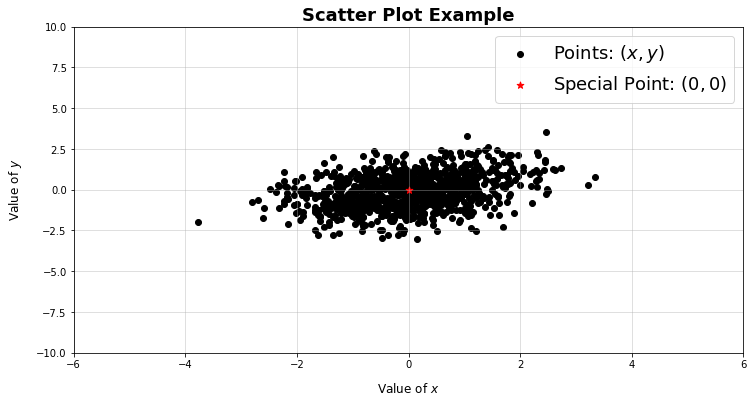

In [8]:
# Create figure and axis:
fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(12, 6))
# nrows, ncols: used for multiple plots in a single figure
# figsize: changes figure window size (length, height)

# Scatter plot:
ax.scatter(x, y,
           color='black',       # color of points
           marker='o',          # marker style
           alpha=1,             # transparency
           label='Points: $(x,y)$')
# label: label for legend,
# notice the use of Latex works in matplotlib

# Add a single point:
ax.scatter(0, 0, s=50,          # s for marker size
           color=(1, 0, 0),     # color specified as RGB triple
           marker='*',          # marker style
           label='Special Point: $(0,0)$')  # notice the use of Latex

# Add title and labels:
ax.set(title='Scatter Plot Example',
       xlabel='Value of $x$',
       ylabel='Value of $y$')

# For more control over title and labels:
ax.set_title('Scatter Plot Example',
             fontdict={'fontsize': 18,  # in pixels
                       'fontweight': 'bold'})
# fontweight: can be an int, like 600, but varies with font
ax.set_xlabel('Value of $x$', fontdict={'fontsize': 12}, labelpad=12)
ax.set_ylabel('Value of $y$', fontdict={'fontsize': 12}, labelpad=12)

# Change range of values on axis:
ax.set_xlim((-6, 6))
ax.set_ylim((-10, 10))
# Same as:
ax.set_xlim(left=-6, right=6)
ax.set_ylim(bottom=-10, top=10)

# Add legends:
ax.legend(loc='best',
          fontsize=18)
# loc: 'upper right', 'center right', 'lower right', and so on

# Turn on a semi-transparent grid:
ax.grid(True, alpha=0.5)

# Save figure:
fig.savefig('scatter-plot.png', dpi=300)
fig.show()

# Close figure window:
# plt.close(fig)
# Commented the command above so you can actually see the figure

Notice the use of `$ $` on labels.
Matplotlib understands Latex expressions without the need of any other adjustment.




# Line Plots



Let's create a line plot of the data:



/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


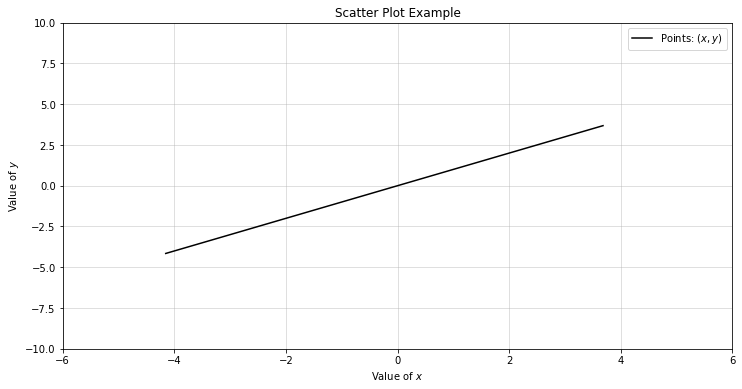

In [9]:
# Estimate linear model
beta_hat = np.linalg.inv(x.T@x)@x.T@y
x_min = 1.1*x.min()
x_max = 1.1*x.max()
x_values = np.linspace(x_min, x_max)
y_values = x_values
# Create figure and axis
fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(12, 6))
# Line plot:
ax.plot(x_values, y_values,
        color='black',
        alpha=1,
        label='Points: $(x,y)$')
# add title and labels
ax.set(title='Scatter Plot Example',
       xlabel='Value of $x$',
       ylabel='Value of $y$')
# change range of values on axis
ax.set_xlim([-6, 6])
ax.set_ylim([-10, 10])
# add legends
ax.legend()
# turn on grid
ax.grid(True, alpha=0.5)
# Save figure:
fig.savefig('line-plot.png', dpi=300)
fig.show()                      # show the figure on a window
# Close figure:
# plt.close(fig)


# Combining the Scatter and Line Plots



/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


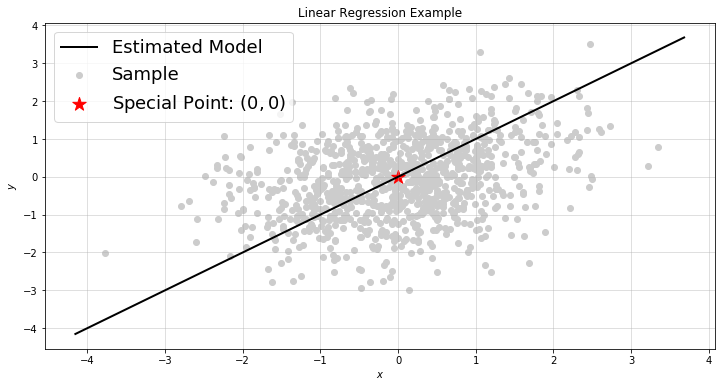

In [11]:
# Create figure and axis:
fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(12, 6))
# Scatter plot:
ax.scatter(x, y, color=[0.8, 0.8, 0.8], marker='o', label='Sample')

# Add a single point:
ax.scatter(0, 0, s=200, color='red', marker='*',
           label='Special Point: $(0,0)$')

# Add the line plot:
ax.plot(x_values, y_values, linewidth=2, color='black',
        label='Estimated Model')

# Add title and labels:
ax.set(title='Linear Regression Example',
       xlabel='$x$',
       ylabel='$y$')
ax.legend(fontsize=18)
ax.grid(True, alpha=0.5)

# Save figure:
fig.savefig('scatter-plot.png', dpi=300)
fig.show()

# Close figure window:
# plt.close(fig)


# Multiple Plots in a Figure



We can create a single figure window that contains separate plots.
That is, we can create a figure window with multiple separate axes.

Now, use `plt.subplots` to create a figure window and multiple axes:



/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


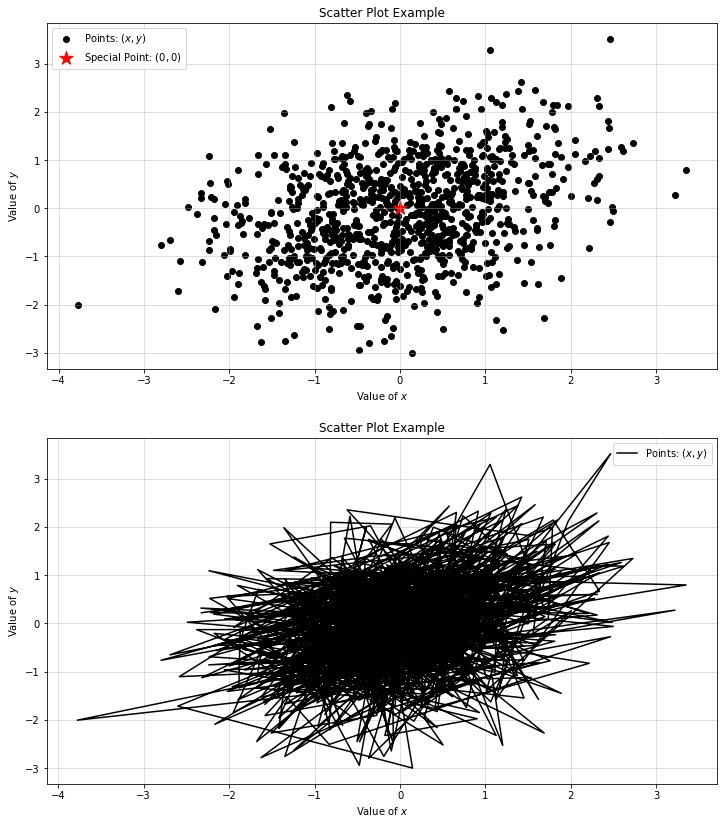

In [12]:
fig, axes = plt.subplots(nrows=2,
                       ncols=1,
                       figsize=(12, 14))  # height is 14 now
# ax is now a Numpy array containing the two axis just created
# We can plot to each axis by using each of the objects
# in the array ax.

# Plot on the first axis:
axes[0].scatter(x, y, color='black', marker='o',
              label='Points: $(x,y)$')
# add a single point
axes[0].scatter(0, 0, s=200,
              color='red', marker='*',
              label='Special Point: $(0,0)$')
# add title and labels
axes[0].set(title='Scatter Plot Example',
          xlabel='Value of $x$',
          ylabel='Value of $y$')

# Plot on the second axis:
axes[1].plot(x, y, color='black',
           label='Points: $(x,y)$')
# add title and labels
axes[1].set(title='Scatter Plot Example',
          xlabel='Value of $x$',
          ylabel='Value of $y$')

# For turning on legends and the grid, we can use a loop:
for axis in axes:
    # add legends
    axis.legend()
    # turn on grid
    axis.grid(True, alpha=0.5)
fig.show()

Notice the change in the `nrows` option and in the `figsize` so that both plots have space in the rendered figure.

Let's create a figure with 4 axes:



/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


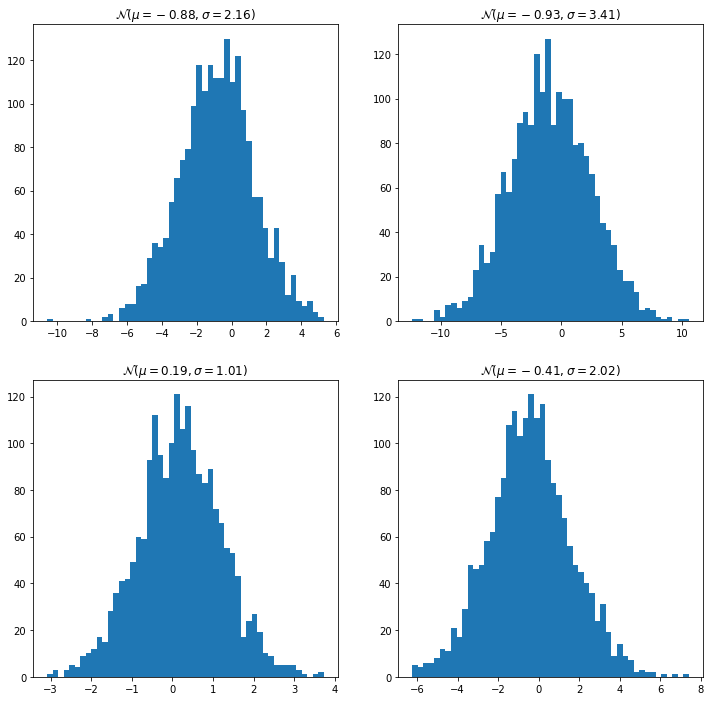

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Now, axes is a 2x2 numpy array, where each element represents one of
# the axis in the figure.
for row in axes:
    for axis in row:
        mean = np.random.uniform(-1, 1)
        std = np.random.uniform(1, 4)
        axis.hist(np.random.normal(mean, std, size=(2000, 1)), bins=50)
        axis.set_title(fr'$\mathcal{{N}}\left(\mu={mean:.2f}, \sigma={std:.2f}\right)$')
fig.show()


# Surface Plots



While the focus of Matplotlib is on 2-dimensional plots, the package still offers some tools to create surface plots.



In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

The `Axes3D` updates `plt` so that we can also create surface plots, and `cm` will be used to specify the color-map of the figure.

Define a function to plot:



In [15]:
def rosenbrock(x, y):
    a = 1
    b = 100
    return (a-x)**2+b*(y-x**2)**2

We need to create a grid of points where the function will be evaluated:



In [16]:
x_grid = np.linspace(-2, 2, 50)
y_grid = np.linspace(-2, 2, 50)
# help(np.meshgrid)
x, y = np.meshgrid(x_grid, y_grid)
z = rosenbrock(x, y)

The elements of `x` and `y` define a mesh of points in the plane.
By getting an element of the matrix in `x` and an element in the same position in the matrix `y`, we can compute the value of `z`.

We can now create the figure and the surface plot.
Here we need to go one level lower and first create the figure, and then add the axis separately.



/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


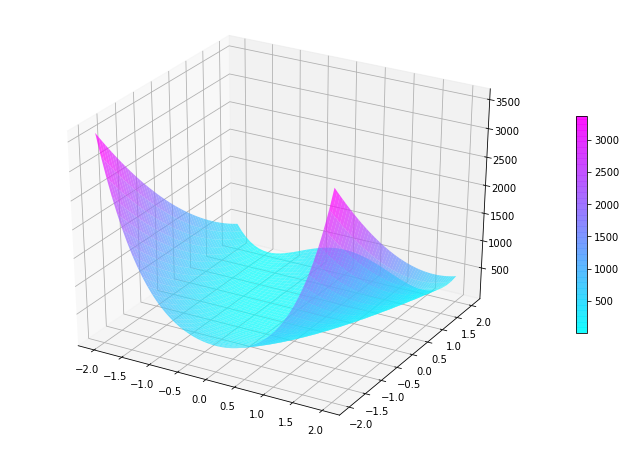

In [17]:
fig = plt.figure(figsize=(12, 8))
axis = fig.add_subplot(1, 1, 1,     # nrows, ncols, index
                       projection='3d')
surf = axis.plot_surface(x, y, z,
                         rcount=50,     # downsamples input x
                         ccount=50,     # downsamples input y
                         alpha=0.7,     # transparency
                         cmap=cm.cool
                         )
# color-map: hot, winter, jet and
#            terrain are some of the many options

fig.colorbar(surf,              # inserts colorbar based on these values
             ax=axis,           # on this axis
             shrink=0.5,        # shrinks the height of the colorbar
             orientation='vertical')
fig.show()

See the [reference page on colormaps](https://matplotlib.org/tutorials/colors/colormaps.html) to see all available options.




# Customizing Defaults



There are a few ways of customizing the defaults on Matplotlib.
A low-level customization of defaults is by altering the properties of the `matplotlib.rcParams`.



In [ ]:
import matplotlib as mpl
# object that holds all default values
print(mpl.rcParams)
fig, ax = plt.subplots()
ax.plot(np.linspace(-5, 5), np.linspace(-5, 5), linewidth=1.5)
# change default value for linewidth
mpl.rcParams['lines.linewidth'] = 5
ax.plot(np.linspace(-5, 5), np.linspace(5, -5))
fig.show()
# Reset default values:
mpl.rcdefaults()

For more details on `rcParams` read [this reference page](https://matplotlib.org/users/customizing.html#matplotlib-rcparams).

There is a high-level way of customizing the defaults via style sheets.
Style sheets are basically files where the `rcParams` have been set in a certain way, and you just use those settings.



/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()
/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


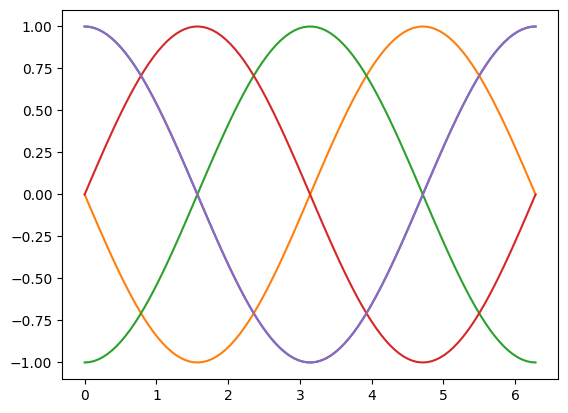

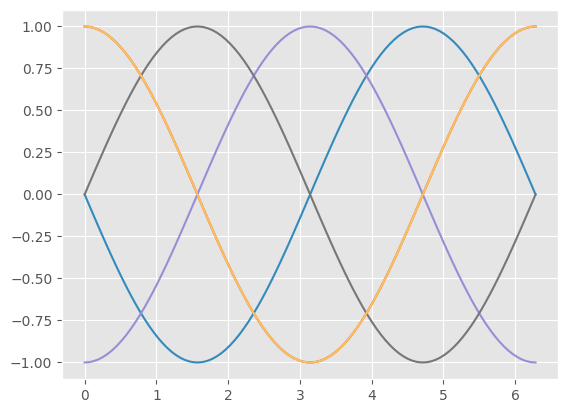

In [19]:
def plotlines():
    fig, ax = plt.subplots()
    for i in range(5):
        x = np.linspace(0, 2*np.pi, 100)
        y = np.cos(x + i*np.pi/2)
        ax.plot(x, y)
    return fig, ax


fig, ax = plotlines()
fig.show()
# change style sheet
plt.style.use('ggplot')
fig, ax = plotlines()
fig.show()

Due to the number of people that have some type of color vision deficiency, we might want to use a more friendly color scheme:



/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/guilhermesalome/Desktop/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


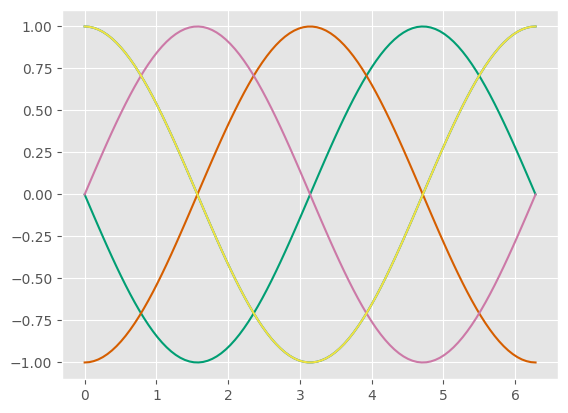

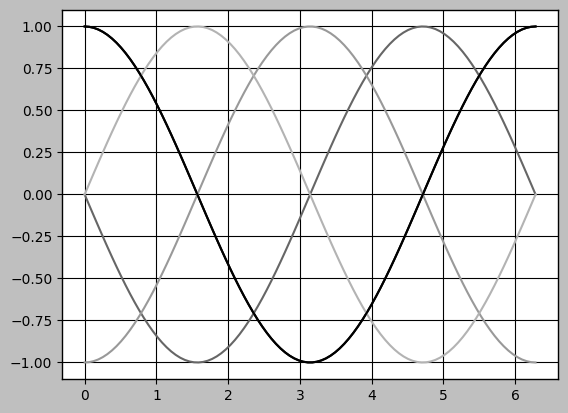

In [20]:
plt.style.use('seaborn-colorblind')
fig, ax = plotlines()
fig.show()
# or a grayscale (which also works well for printing)
plt.style.use('grayscale')
fig, ax = plotlines()
fig.show()

The official [style sheets reference page](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) contains the names of the different built-in styles. This [page](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html) also displays the different style sheets, but with different styles of plots.

